# Project: Patient No Show Appointment Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction to no show appointments</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project am going to analyze No-show Appointments dataset.This dataset contains patients's information such as ID's,Appointments and other personal details. i am going to explore patients no show appointment data and correlate it with other details             

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
Created a dataframe from the csv file and printed few lines to see the data.Checked for datatypes and null values in each column

### General Properties

In [2]:
# Load your data and print out a few lines. 
no_show_df = pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')
print(no_show_df.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
#Perform operations to inspect datatypes and look for instances of missing or possibly errant data.
print (no_show_df.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


checking for datatypes in all the columns

In [4]:
#Looking for null values 
print(no_show_df.isnull().values.all())
print(no_show_df.isnull().sum())

False
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


There are no values in any column

In [5]:
#looking for erroneous data
tempdf = no_show_df[no_show_df['ScheduledDay'] > no_show_df['AppointmentDay']]
print(len(tempdf))
print(tempdf)

38568
           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
19      7.223289e+12        5640433      F  2016-04-29T10:43:14Z   
24      8.734858e+12        5641780      F  2016-04-29T14:19:19Z   
26      2.578785e+10        5641781      F  2016-04-29T14:19:42Z   
28      5.926172e+12        5642400      M  2016-04-29T15:48:02Z   
29      1.225776e+12        5642186      F  2016-04-29T15:16:29Z   
32      5.288356e+13        5637908      M  2016-04-29T07:30:27Z   
34      1.999976e+13        5637963      F  2016-04-29T07:34:30Z   
35      7.816264e+13        5637968      M

tempdf are erroneous records, have to delete them

Clean datatypes
### Data Cleaning 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#changing data types 
no_show_df['ScheduledDay'] = pd.to_datetime(no_show_df['ScheduledDay'])

print(type(no_show_df['ScheduledDay'][0]))

no_show_df['AppointmentDay'] = pd.to_datetime(no_show_df['AppointmentDay'])

print(type(no_show_df['AppointmentDay'][0]))

print(type(no_show_df['Scholarship'][0]))

#Removing erroneous data

parsed_df = no_show_df[no_show_df['ScheduledDay'] < no_show_df['AppointmentDay'] ]

print(len(parsed_df))


<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>
<class 'numpy.int64'>
71959


<a id='eda'></a>
## Exploratory Data Analysis

### SMS_received data Vs No show data

[Text(0,0.5,'SMS Received Proportion'), Text(0.5,1,'SMS recieved Vs No-show')]

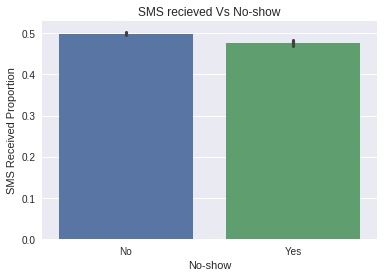

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

barplot = sns.barplot( x = "No-show", y = "SMS_received", data = parsed_df)
barplot.set(ylabel = "SMS Received Proportion",title = "SMS recieved Vs No-show")

As we observe the above graph we get to see that patienst who showed up for appointment has got more SMS received than patients who did not show up for appointment, hence we can consider SMS as one of the factors for No Show

### Scholarship data Vs No show data

[Text(0,0.5,'Scholarship Received Proportion'),
 Text(0.5,1,'Scholarship Recieved Vs No-show')]

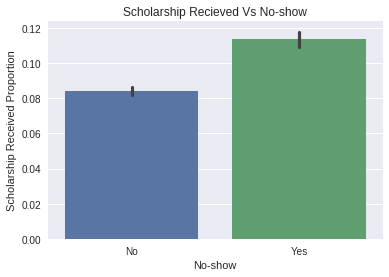

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

barplot = sns.barplot( x = "No-show", y = "Scholarship", data = parsed_df)
barplot.set(ylabel = "Scholarship Received Proportion",title = "Scholarship Recieved Vs No-show")

In this plot, the people without scholarships showed up more in number for appointment and people with scholarships showed up less in number when compared to people who did not show up

### Scholarship Vs Diabetes

[Text(0,0.5,'Scholarship Received Proportion'),
 Text(0.5,1,'Scholarship Vs Diabetes')]

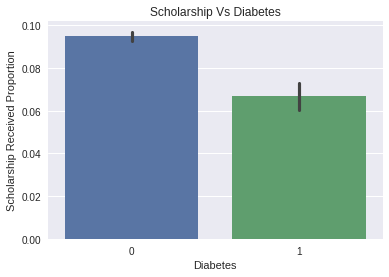

In [26]:

barplot = sns.barplot( x = "Diabetes", y = "Scholarship", data = parsed_df)
barplot.set(ylabel = "Scholarship Received Proportion",title = "Scholarship Vs Diabetes")

Patients with diabetes are less likely having scholarships

### Scholarship Vs Hipertension

[Text(0,0.5,'Scholarship Received Proportion'),
 Text(0.5,1,'Scholarship Received Vs Hipertension')]

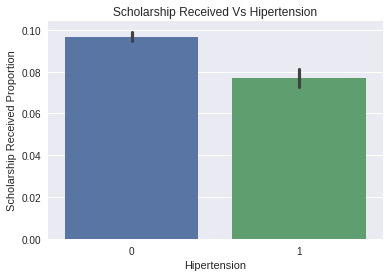

In [17]:

barplot = sns.barplot( x = "Hipertension", y = "Scholarship", data = parsed_df)
barplot.set(ylabel = "Scholarship Received Proportion",title = "Scholarship Vs Hipertension")

patients with hipertension are less likely having scholarships

### Scholarship Vs Alcoholism

[Text(0,0.5,'Scholarship Received Proportion'),
 Text(0.5,1,'Scholarship Received Vs Alcoholism')]

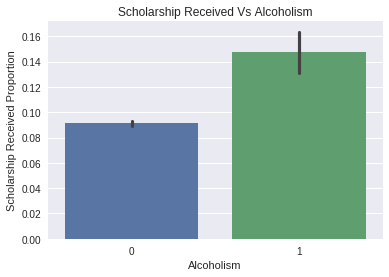

In [19]:

barplot = sns.barplot( x = "Alcoholism", y = "Scholarship", data = parsed_df)

barplot.set(ylabel = "Scholarship Received Proportion",title = "Scholarship Vs Alcoholism")

Patients who drink alcohol are more likely having scholarships

### No show Vs Diabetes

[Text(0,0.5,'Diabetes Proportion'), Text(0.5,1,'No-show Vs Diabetes')]

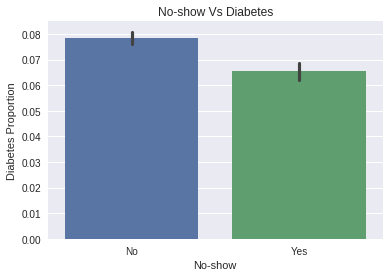

In [20]:

barplot = sns.barplot( x = "No-show", y = "Diabetes", data = parsed_df)
barplot.set(ylabel = "Diabetes Proportion",title = "No-show Vs Diabetes")

Patients with  Diabetes are less likely shown on their appointment days

### No show Vs Hipertension

[Text(0,0.5,'Hipertension Proportion'), Text(0.5,1,'No-show Vs Hipertension')]

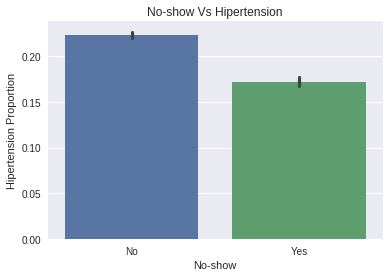

In [21]:

barplot = sns.barplot( x = "No-show", y = "Hipertension", data = parsed_df)
barplot.set(ylabel = "Hipertension Proportion",title = "No-show Vs Hipertension")

In [ ]:
Patients who had hipertension are most likely showing up on their appointment days

### No show Vs Alcoholism

[Text(0,0.5,'Alcoholism Proportion'), Text(0.5,1,'No-show Vs Alcoholism')]

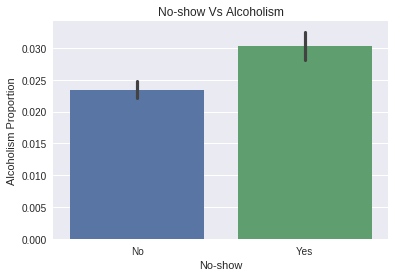

In [22]:

barplot = sns.barplot( x = "No-show", y = "Alcoholism", data = parsed_df)
barplot.set(ylabel = "Alcoholism Proportion",title = "No-show Vs Alcoholism")

Patients who drink alcohol did not show up for appointment more in number

<a id='conclusions'></a>
## Conclusions


Finally, i have observed following correlations:

SMS notification and No-show : there is a direct relation betwenn these items,when there is an SMS, there are more chances for that patient to show up for that particular Appointment,however a patient who showed up for appointment does not necessarily recieve an SMS

Diabetes and No-show: The Diabetes Patients may show up for an appointment, however showed up patients may or may not have diabetes

Hipertension and No-show:The Hipertension Patients may show up for an appointment, however showed up patients may or may not have  hipertension


Alcoholism,NO-show,Scholarships,Diabetes, Hipertension:The Alcoholic patients has an inverse relation with no-show, however patients with no-show might not be an alcoholic .Alcoholism has direct relation with Scholarships.People who recieve scholarship is not an alcoholic necessarily.Diabetes and Hipertension patients have less number of scholarships than Alcoholic patients, this does not imply that Scholarships are given more to alcoholic patients

I would like to conclude that the above are only correlations and there is no direct cause .This proves that Correlation does not imply causation

In [10]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0